# Cats Vs Dogs
## Transfer Learinig Using ResNet34 


### 5 steps to be followed while doing transfer learning:-
### 1.Run as is and find suitable learning rate.
### 2.Turn (precompute=False) Apply Data Augmentation and train.
### 3.Unfeeze layers and train again.
### 4.Now set lr lower for initial layers and higher for final layers.
### 5.Retrain all layers 

In [20]:
# for automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [21]:
# importing libraries
from fastai.imports import *
from fastai.conv_learner import *

In [22]:
PATH = '/home/parth/Github/hello/CatsDogs/'
sz=224

In [23]:
import os
os.listdir(PATH)

['train', 'valid']

In [30]:
# first run of resnet34 on our dataset
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 5)

epoch      trn_loss   val_loss   accuracy                
    0      0.70688    0.31477    0.916667  
    1      0.441086   0.103427   0.966667                
    2      0.300292   0.069166   0.983333        
    3      0.244328   0.059348   0.983333        
    4      0.198827   0.059426   0.983333        



[array([0.05943]), 0.9833333333333333]

In [33]:
learn.lr_find()

epoch      trn_loss   val_loss   accuracy         
    0      0.025377   0.054542   0.983333  



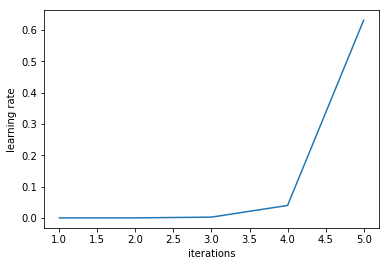

In [36]:
learn.sched.plot_lr()

In [37]:
# now applying data augmentation
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [38]:
# training 2nd time
learn.precompute=False
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [42]:
learn.fit(1e-2,5,cycle_len=1)

epoch      trn_loss   val_loss   accuracy                 
    0      0.02348    0.055043   0.966667  
    1      0.025697   0.05408    0.966667         
    2      0.020355   0.05435    0.966667                 
    3      0.030166   0.054342   0.966667                 
    4      0.030035   0.054749   0.966667         



[array([0.05475]), 0.9666666666666667]

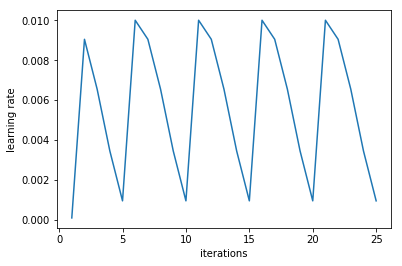

In [43]:
learn.sched.plot_lr()

In [44]:
#unfreeze all layers and train 
learn.unfreeze()

In [45]:
# Setting lower learning rate for initial layers than final layers and training for final time.
lr=np.array([1e-4,1e-3,1e-2])

In [46]:
learn.fit(lr, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                 
    0      0.058815   0.053538   0.966667  
    1      0.04837    0.053937   0.966667                 
    2      0.053026   0.052812   0.966667                 



[array([0.05281]), 0.9666666666666667]

In [47]:
# cycle_mult=2 and train
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                 
    0      0.031759   0.052975   0.966667  
    1      0.036487   0.052599   0.966667                 
    2      0.032933   0.052444   0.966667                 
    3      0.028655   0.053348   0.983333                 
    4      0.029407   0.051871   0.983333                 
    5      0.029032   0.053052   0.983333                 
    6      0.028403   0.052756   0.983333                 



[array([0.05276]), 0.9833333333333333]

In [50]:
# Apply TTA(Test Time Augmentation) for predicting
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [51]:
accuracy_np(probs, y)

1.0

## So the final accuracy of the model is 100% after applying TTA.